## Problem Statement

The New York City Controller's Office maintains a database of the salary and benefits paid to city employees since the fiscal year 2013. This is data representing the Employee Compensation report.

**Year Type:**		Fiscal (July through June) or Calendar (January through December)<br>

**Year:**		An accounting period of 12 months. The New York City operates operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.<br>

**Employee Identifier:**		Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset.<br> 

**Salaries:**		Normal salaries paid to permanent or temporary City employees. <br>

**Overtime:**		Amounts paid to City employees working in excess of 40 hours per week. <br>

**Other Salaries:**		Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. <br>

**Total Salary:**		The sum of all salaries paid to City employees.<br>

**Retirement:**		City contributions to employee retirement plans. <br>

**Health/Dental:**		City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. <br>

**Other Benefits:**		Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.<br>

**Total Benefits:**		The sum of all benefits paid to City employees.<br>

**Total Compensation:**		The sum of all salaries and benefits paid to City employees.

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Outlier Analysis and Treatment](#outlier)**
    - 2.3 - **[Missing Value Analysis and Treatment](#null)**
    - 2.4 - **[Scale the Data](#scale)**
3. **[What is Regression Analysis?](#def)**
4. **[Bivariate Regression](#Bivariate)**
   - 4.1 - **[Ordinary Least Square Method (OLS)](#lsm)**
   - 4.2 - **[Measures of Variation](#mv)**
      - 4.2.1 - **[Sum of Squared Residuals (SSR)](#ssr)**
      - 4.2.2 - **[Sum of Squared Error (SSE)](#sse)**
      - 4.2.3 - **[Sum of Squared Total (SST)](#sst)**
      - 4.2.4 - **[Coefficient of Determination (R-Squared)](#r2)**
      - 4.2.5 - **[Standard Error of Estimate (SEE)](#see)**
   - 4.3 - **[Inferences about Slope and Intercept](#inf)**
      - 4.3.1 - **[Interpretation of Slope and Intercept](#inter)**
      - 4.3.2 - **[The t-test for Slope and Intercept](#t_test)**
      - 4.3.3 - **[Confidence Interval for Slope and Intercept](#ci)**
      - 4.3.4 - **[ANOVA for SLR](#anova)**


<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Understand the Data

#### Read the dataset and print the first five observations.

In [2]:
# load the csv file
# store the data in 'df_compensation'
df_compensation = pd.read_csv('employee_compensation.csv')

# display first five observations using head()
df_compensation.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.220000,267.450000,267.450000,92823.120000,20700.200000,12500.560000,7605.750000,40806.510000,133629.630000
1,Calendar,2015,28248,1466.380000,348.230000,0.000000,1814.610000,0.000000,442.030000,141.590000,583.620000,2398.230000
2,Fiscal,2014,30651,76536.950000,13583.720000,10855.940000,100976.610000,18632.190000,12464.610000,8011.410000,39108.210000,140084.820000
3,Fiscal,2014,19473,45659.880000,0.000000,1625.370000,47285.250000,10081.200000,0.000000,3936.630000,14017.830000,61303.080000
4,Fiscal,2013,7176,41832.000000,0.000000,0.000000,41832.000000,7617.600000,5908.520000,3254.500000,16780.620000,58612.620000


**Let us now see the number of variables and observations in the data.**

In [3]:
# use 'shape' to check the dimension of data
df_compensation.shape

(50000, 12)

**Interpretation:** The data has 50000 observations and 12 variables.

**Get a concise summary of the DataFrame.**

In [4]:
# use 'info()' to understand the dataset
df_compensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Year_Type              50000 non-null object
Year                   50000 non-null int64
Employee_Identifier    50000 non-null int64
Salaries               50000 non-null float64
Overtime               50000 non-null float64
Other_Salaries         50000 non-null float64
Total_Salary           50000 non-null float64
Retirement             50000 non-null float64
Health/Dental          50000 non-null float64
Other_Benefits         50000 non-null float64
Total_Benefits         50000 non-null float64
Total_Compensation     50000 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


**Interpretation:** The variable `Year_Type` is categorical. All the other variables are numerical.

From the above output, we see that the data type of `Year` is 'int64'.

But according to the data definition, `Year` is categorical variable, which is wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [5]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'Year'
df_compensation['Year'] = df_compensation['Year'].astype(object)

#### Recheck the data type after the conversion. 

In [6]:
# recheck the data types using 'dtypes'
df_compensation.dtypes

Year_Type               object
Year                    object
Employee_Identifier      int64
Salaries               float64
Overtime               float64
Other_Salaries         float64
Total_Salary           float64
Retirement             float64
Health/Dental          float64
Other_Benefits         float64
Total_Benefits         float64
Total_Compensation     float64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `Employee_Identifier` contains the id of the employee, which is redundant for further analysis. Thus, we drop the column.

In [7]:
# drop the column 'Employee_Identifier' using drop()
# 'axis = 1' drops the specified column
df_compensation = df_compensation.drop('Employee_Identifier',axis=1)

<a id="outlier"></a>
## 2.2 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

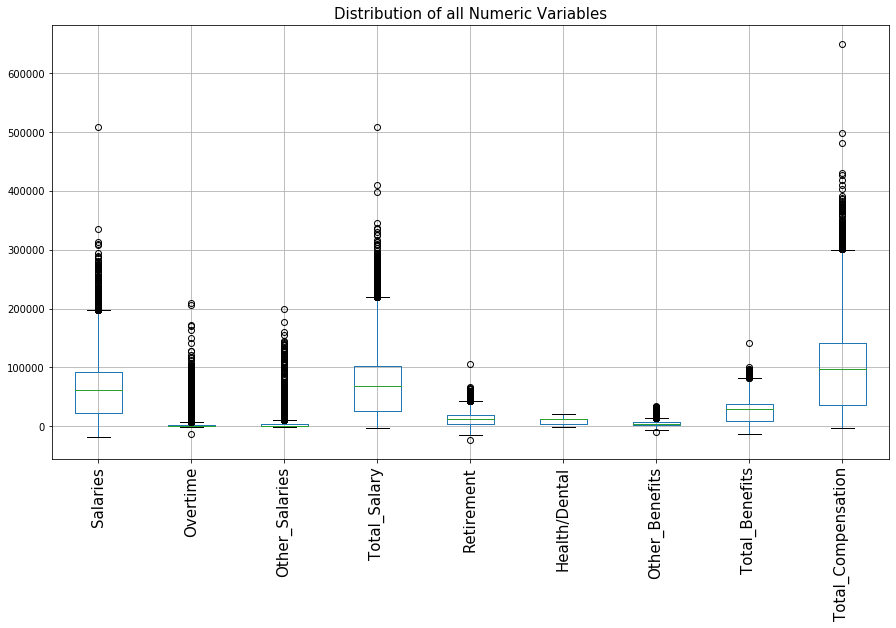

In [8]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_compensation.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variables 'Salaries', 'Total_Salary' and 'Total_Compensation' have a quite large range as compared to the other variables. Thus, it is difficult to see the outliers in such variables. So, we plot the boxplots of independent variables again by not considering the variables 'Salaries', 'Total_Salary' and 'Total_Compensation'. The variable Health/Dental has no outliers.**

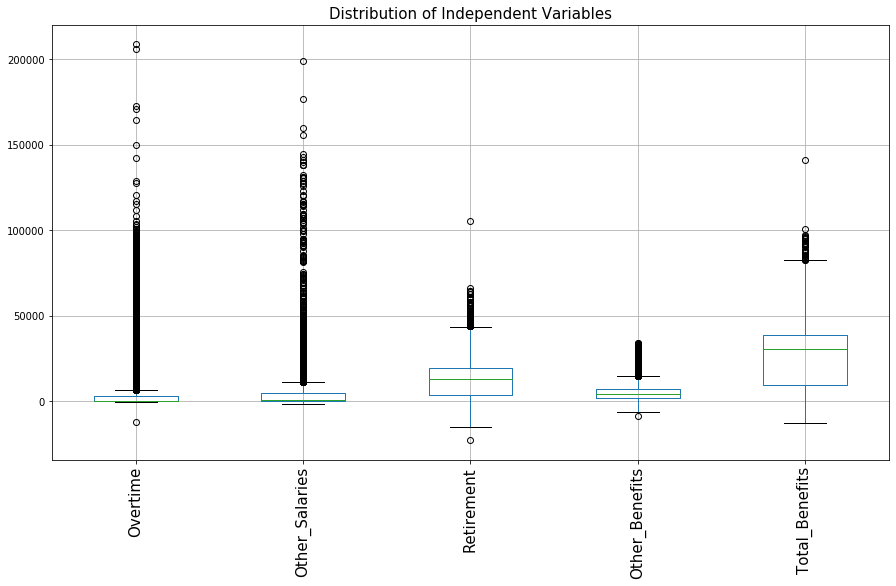

In [9]:
# boxplot of independent variables

# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplots of all the numeric variables except the variables 'Salaries', 'Total_Salary' and 'Total_Compensation' 
# use 'loc[]' to select the variables
df_compensation.loc[:,['Overtime', 'Other_Salaries', 'Retirement', 'Other_Benefits', 'Total_Benefits']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of the target (dependent) variable 'Total_Compensation'.**

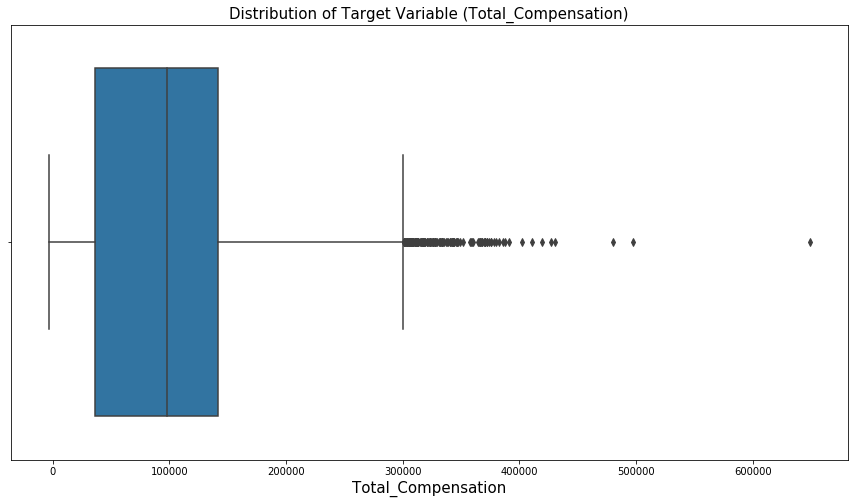

In [10]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplot for 'Total_Compensation' using seaborn library
sns.boxplot(df_compensation['Total_Compensation'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Total_Compensation)', fontsize = 15)
plt.xlabel('Total_Compensation', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that all the variables have points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.

Let us use the IQR method to remove the outliers.

In [11]:
# calculate the first quartile
Q1 = df_compensation.quantile(0.25)

# calculate the third quartile
Q3 = df_compensation.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_compensation = df_compensation[~((df_compensation < (Q1 - 1.5 * IQR)) | (df_compensation > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_compensation.shape

(37721, 11)

**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 2.3 Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [12]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_compensation.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_compensation.isnull().sum()*100/df_compensation.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Total_Compensation,0,0.000000
Total_Benefits,0,0.000000
Other_Benefits,0,0.000000
Health/Dental,0,0.000000
Retirement,0,0.000000
Total_Salary,0,0.000000
Other_Salaries,0,0.000000
Overtime,0,0.000000
Salaries,0,0.000000
Year,0,0.000000


**Interpretation:** There are no missing values in the data.

<a id="scale"></a>
## 2.4 Scale the Data

In [13]:
df_compensation.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.220000,267.450000,267.450000,92823.120000,20700.200000,12500.560000,7605.750000,40806.510000,133629.630000
1,Calendar,2015,1466.380000,348.230000,0.000000,1814.610000,0.000000,442.030000,141.590000,583.620000,2398.230000
3,Fiscal,2014,45659.880000,0.000000,1625.370000,47285.250000,10081.200000,0.000000,3936.630000,14017.830000,61303.080000
4,Fiscal,2013,41832.000000,0.000000,0.000000,41832.000000,7617.600000,5908.520000,3254.500000,16780.620000,58612.620000
5,Calendar,2013,74132.000000,0.000000,1443.420000,75575.420000,14851.230000,12888.340000,6233.850000,33973.420000,109548.840000


In [14]:
# scale the independent numeric variables
df_compensation.iloc[:, 2:11] = df_compensation.iloc[:, 2:11].apply(lambda rec: (rec - rec.mean()) / rec.std())

df_compensation.head()

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,1.001727
1,Calendar,2015,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,-1.304472
3,Fiscal,2014,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,-0.269306
4,Fiscal,2013,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,-0.316586
5,Calendar,2013,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,0.578543


In [15]:
df_compensation.shape

(37721, 11)

<a id="def"></a>
# 3. What is Regression Analysis?

#### Dependent variable (y): It is the variable that we predict. It is also known as 'Target' or 'Response' variable. For regression, the dependent variable should be numeric.

#### Independent variable (X): It is the variable used in predicting the values of a target variable. There can be one or more independent variables in a dataset. It is also known as 'predictors' or 'features'. These variables can be numerical as well as categorical.

Regression analysis is used to understand the effect of a set of independent variables on the dependent variable. The variables that affect the dependent variable the most can also be identified. Linear regression is one of the methods in regression analysis, which fits the line to predict the values of the dependent variable.

<a id="Bivariate"></a>
# 4. Bivariate Regression

It determines the linear relationship between the dependent (y) and a independent (X) variable. It is also known as, `Simple Linear Regression (SLR)`. The mathematical equation is given as:<br>
<p style='text-indent:30em'> <strong> y = β<sub>0</sub> + β<sub>1</sub>.x + ε </strong> </p>
                                                        
where, 

y   =  Dependent variable <br>
x   =  Independent variable<br>
β<sub>0</sub>  =  Y-intercept (value of y when x = 0)<br>
β<sub>1</sub>  =  Beta coefficient of x <br>
ε   =  Random error component<br>

**For bivariate regression, consider 'Total_Compensation' as target variable and 'Total_Benefits' as an independent variable from 'df_compensation'.**

The test hypothesis for SLR is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: Slope (beta coefficient of x) is equal to zero</strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: Slope (beta coefficient of x) is not equal to zero</strong> </p>

<a id="lsm"></a>
## 4.1 Ordinary Least Square Method (OLS)

The ordinary least square method aims to minimize the sum of the squared difference between the actual and the predicted values. Squaring ensures that each term is positive. It penalizes the model for the negative error terms. This approach calculates the β<sub>0</sub> and β<sub>1</sub> values that minimize the sum of squared differences along the line of prediction.

#### Split the data into training and test sets

In [17]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df_compensation['Total_Benefits'], df_compensation['Total_Compensation'], 
                                                    random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (26404,)
y_train_slr (26404,)
X_test_slr (11317,)
y_test_slr (11317,)


**Build the simple linear regression model using the OLS method.**

In [18]:
# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr.head()

,intercept,Total_Benefits
7580,1.000000,0.354816
15923,1.000000,1.316932
5380,1.000000,0.242893
9580,1.000000,-0.352773
3690,1.000000,-1.353940


In [19]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 4.729e+05
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:40:58   Log-Likelihood:                 1460.8
No. Observations:               26404   AIC:                            -2918.
Df Residuals:                   26402   BIC:                            -2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0002      0.001     -0.

**Interpretation:** The R-squared value obtained from this model is 94.7 which means that the above model explains 94.7% of the variation in the Total_Compensation. 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 1.998) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (= 1) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is no multicollinearity in the data.

**Calculate the predicted Total_Compensation for train data using the above model.**

Use the above dataframe to predict the Total_Compensation.

In [20]:
# predict the Total_Compensation using 'predict()' on training data
y_train_slr_pred = SLR_model.predict(X_train_slr)

# display the first five predicted values 
y_train_slr_pred.head()

7580     0.345104
15923    1.281337
5380     0.236191
9580    -0.343450
3690    -1.317684
dtype: float64

Now we have actual and predicted values of the target variable for training dataset (y_train_slr and y_train_pred respectively)

<a id="mv"></a>
## 4.2 Measures of Variation

**Residual:** It is calculated as the difference between the actual and predicted value of the dependent variable.

<a id="ssr"></a>
### 4.2.1  Sum of Squared Residuals (SSR)

It is defined as the sum of the squared difference between the predicted value and the mean of the dependent variable.

In [21]:
# calculate the SSR on train dataset
ssr = np.sum((y_train_slr_pred - y_train_slr.mean())**2)
ssr

24792.319612330157

<a id="sse"></a>
### 4.2.2 Sum of Squared Error (SSE)

It is defined as the sum of the squared difference between the actual value and the predicted value.

In [22]:
# calculate the SSE on train dataset
sse = np.sum((y_train_slr - y_train_slr_pred)**2)
sse

1384.010118201885

<a id="sst"></a>
### 4.2.3  Sum of Squared Total (SST)

It is the sum of the squared difference between the actual value and the mean of the dependent variable.

In [23]:
# calculate the SST on train dataset
sst = np.sum((y_train_slr - y_train_slr.mean())**2)
sst

26176.329730532045

In [24]:
# add the values of SSE and SSR
sse + ssr

26176.32973053204

**Interpretation:** From the abve putput, we can verify that SST (Total variation) is the sum of SSR and SSE.

<a id="r2"></a>
### 4.2.4 Coefficient of Determination (R-Squared)

The coefficient of determination explains the percentage of variation in the dependent variable that the independent variables explain collectively.

In [25]:
# calculate R-Squared on train dataset
# use 'rsquared' method from statsmodel
r_sq = SLR_model.rsquared

# print the R-squared value
r_sq

0.9471274188379597

Now, we can also calculate the R-squared value using the formula (SSR/SST).

In [26]:
# calculate R-Squared on train dataset using the formula
r_sq = ssr/sst

# print the R-squared value
r_sq

0.9471274188379596

**Interpretation:** From the above output we can conclude that our model explains 94.71% variation in the Total_Compensation. We can also obtain this value from the summary of the model.

<a id="see"></a>
### 4.2.5 Standard Error of Estimate (SEE)

The SEE is the measure of the variability of actual values around the prediction line. Smaller the value of SEE better is the model.

In [27]:
# compute SEE using the below formula 
# see =  np.sqrt(sse/(len(train_data) - k))    

# for SLR take k = 2, as there are two coefficients (parameters) in the model
see = np.sqrt(sse/(len(X_train_slr) - 2))    
see

0.22895557304369393

Let us visualize the variability around the predicted line using regression plot.

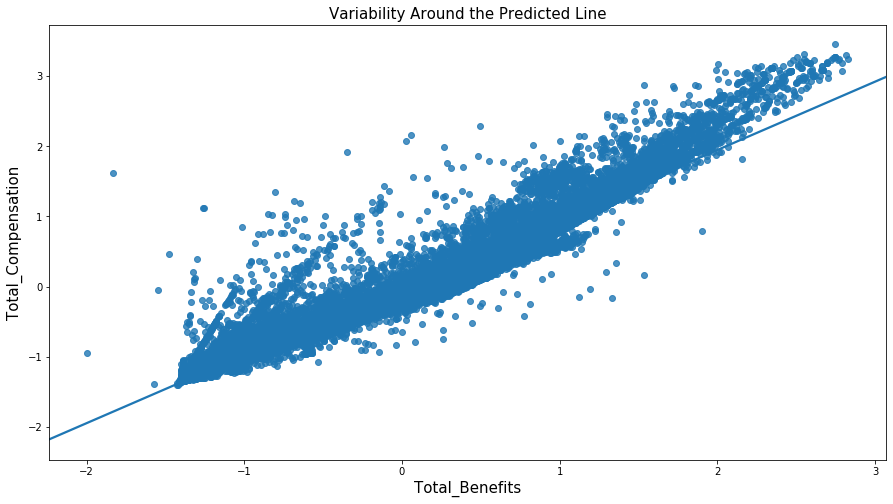

In [28]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a regression plot
# independent variable on x-axis and dependent variable on y-axis
sns.regplot(x = X_train_slr['Total_Benefits'], y = y_train_slr)

# add axes and plot labels
# set text size using 'fontsize'
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.xlabel('Total_Benefits', fontsize = 15)
plt.ylabel('Total_Compensation', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The blue line in the plot, indicates the regression line for the data. We can observe that most of the data points lie on (or near) the line. Also, some of the points are away from the line, which concludes the variation of the data to the fitted line. The shaded part in blue around the line shows the confidence interval for the regression line.

<a id="inf"></a>
## 4.3 Inferences about Slope and Intercept

Let us print the summary of the regression model (built in section 4.1).

In [29]:
# print the model summary
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 4.729e+05
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:41:20   Log-Likelihood:                 1460.8
No. Observations:               26404   AIC:                            -2918.
Df Residuals:                   26402   BIC:                            -2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0002      0.001     -0.

Now, let us make some inferences about the output given above.

<a id="inter"></a>
### 4.3.1 Interpretation of Slope and Intercept

The output of the regression model returns the value of slope (β<sub>1</sub>) and Intercept (β<sub>0</sub>). 

**Intercept (β<sub>0</sub>) = -0.0002**, indicates that if the Total_Benefits is zero, then the average Total_Compensation is -0.0002. <br>

**The slope of 'Total_Benefits' (β<sub>1</sub>) = 0.9731**, indicates that by increasing the Total_Benefits percentage by 1%, the average Total_Compensation increases by 0.9731.


Thus, the equation of the line given by the model is:
<p style='text-indent:25em'> <strong> Total_Compensation = -0.0002 + 0.9731*(Total_Benefits) </strong>  </p>

<a id="t_test"></a>
### 4.3.2 The t-test for Slope and Intercept

The coefficient of regression captures the presence of a linear relationship between the independent and dependent variables. If the coefficient value is zero, we can infer that there is no linear relationship between the two variables which is statistically important. It is calculated as:
<p style='text-indent:28em'> <strong> t_value = coefficient / Standard_error </strong>  </p>

The test hypothesis for the t-test is given as:
<p style='text-indent:35em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> </p>
<p style='text-indent:35em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> </p>
                                    
Now, let us see how to calculate the t_test value for slope and intercept.

In [30]:
# perform t_test for intercept
# 'params[0]' returns the value of intercept 
# 'bse[0]' returns the standard error of intercept
t_intercept = SLR_model.params[0] / SLR_model.bse[0]

# print the value of t-statistic
t_intercept

-0.1186262297885362

In [31]:
# t_test for slope
# 'params[1]' returns the value of slope
# 'bse[1]' returns the standard error of slope
t_slope = SLR_model.params[1] / SLR_model.bse[1]

# print the value of t-statistic
t_slope

687.7132023629403

Now, let us see how to calculate the p-value associated with t_test value for slope and intercept.

In [32]:
# calculate p-value for intercept
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for intercept
# degrees of freedom = n - 1 = 1043 - 1 = 1042
pval = stats.t.sf(np.abs(t_intercept), 1042)*2 
pval

0.9055943477842103

In [33]:
# calculate p-value for slope
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for slope
# degrees of freedom = n - 1 = 1043 - 1 = 1042
pval = stats.t.sf(np.abs(t_slope), 1042)*2 
pval

0.0

**Interpretation:** The 'P > |t|' in the model summary indicates the p-value for the corresponding t-test. In our case, the p-value for the slope is zero i.e. p-value < 0.05 (with 5% level of significance). Thus, we can say that the slope is significant for the target variable.<br>
But, the p-value for the intercept is not zero i.e. p-value > 0.05 (with 5% level of significance). Thus, we can say that the intercept is insignificant for the target variable.

<a id="ci"></a>
### 4.3.3 Confidence Interval for Slope and Intercept

The 95% confidence interval for the variable implies that the value for the variable will be between the given interval for 95% of the cases. We can calculate the confidence interval as:

<p style='text-indent:28em'> <strong> CI = coefficient ± t_table_value*Standard_error </strong>  </p>

Here, 
t_table_value is obtained from the t-table with degrees of freedom (n-k) = (1043 - 2) = 1041 and 95% confidence level.

In [34]:
# CI for intercept
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_inter_min, CI_inter_max = SLR_model.params[0] - (1.9622*SLR_model.bse[0]), SLR_model.params[0] + (1.9622*SLR_model.bse[0])

# print the confidence interval for intercept 
print('CI for intercept:', [CI_inter_min , CI_inter_max])

CI for intercept: [-0.0029319285682736676, 0.002597634789115615]


In [35]:
# CI for slope
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_slope_min, CI_slope_max = SLR_model.params[1] - (1.9622*SLR_model.bse[1]), SLR_model.params[1] + (1.9622*SLR_model.bse[1])

# print the confidence interval for slope
print('CI for slope:', [CI_slope_min,CI_slope_max])

CI for slope: [0.9703214410276182, 0.9758743741623093]


<a id="anova"></a>
### 4.3.4 ANOVA for SLR

ANOVA (Analysis of Variance) is used to test the significance of the linear regression model. The test hypothesis for ANOVA is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> (i.e. regression model is significant) </p>

To perform ANOVA using `anova_lm` method, we build the SLR model using `ols` method in the statsmodel library.

In [36]:
# build a SLR model using 'ols' method
# pass the regression model to the parameter 'formula'
# concatenate the training dataset and pass to the parameter 'data' to build the model on training dataset
# 'axis=1' concats the data column-wise
# 'fit()' is used to fit the model
slr_ols = ols(formula = 'Total_Compensation ~ Total_Benefits', data = pd.concat([X_train_slr, y_train_slr], axis=1)).fit()
# this model returns the same result as of model built using 'OLS' 

In [37]:
# perform ANOVA on the above model using 'anova_lm'
# pass the linear model to 'anova_lm'
anova_slr = anova_lm(slr_ols)

# print the ANOVA results
anova_slr

,df,sum_sq,mean_sq,F,PR(>F)
Total_Benefits,1.000000,24792.319612,24792.319612,472949.448704,0.000000
Residual,26402.000000,1384.010118,0.052421,nan,nan


**Interpretation:** The above ANOVA result returns the F-statistic and corresponding p-value for the linear model. As, the p-value is less than 0.05, we accept the alternate hypothesis (i.e. the regression model is significant). We can also obtain these values from the summary of the model.